<a href="https://colab.research.google.com/github/SNJ292/snj292.github.io/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
from bs4 import BeautifulSoup
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


years = list(range(2012, 2022))
url_start = "https://www.basketball-reference.com/draft/NBA_{}.html"

# We're using the url to populate our file 'draft' with drafts between 2012-2022
for year in years:
  url = url_start.format(year)
  data = requests.get(url)

  with open("draft/{}.html".format(year), "w+")as f:
    f.write(data.text)

In [ ]:

dfs = []
for year in years:
  #dfs  will hold a list of the dataframes of each draft 
  with open("draft/{}.html".format(year)) as f:
    page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    draft_table = soup.find(id="stats")
    draft = pd.read_html(str(draft_table))[0]
    draft.head()

    dfs.append(draft)
dfs

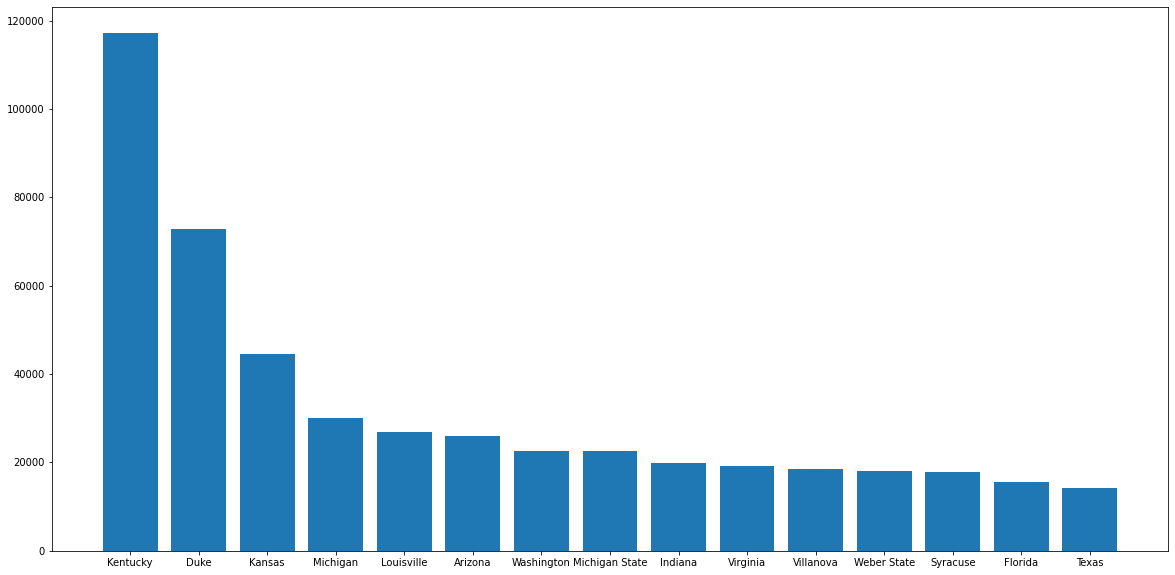

In [108]:
#What college produces the most point scoring players historically. 

college_points = {}

#Iterates through the draft and looks at each player 
for draft in dfs:
  for player in draft.iterrows():
   
    #Finds the college the player used to play for and the total career points that player has made
    if(player[1]["PTS"] != "Totals" and player[1]["PTS"] != "PTS"):
      college = player[1]["College"]
      points = player[1]["PTS"]
      
      #Maps the points to the designated college
      if(college != "NaN"):
        if(college_points.__contains__(college) == True):
          college_points[college] = college_points[college] + float(points)

        elif(college_points.__contains__(college) == False):
          college_points[college] = float(points)

#Removes any empty colleges that don't have any points
items = list(college_points.items())
while len(items) > 0:
  key, val = items.pop()
  if np.isnan(val):
    college_points.pop(key)

#Sorts the dictionary and plots it onto a bar graph
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sorted_cp = sorted(college_points.items(), key=lambda x: x[1], reverse = True)[:15]
plt.bar(range(len(sorted_cp)), [value for key, value in sorted_cp])
plt.xticks(range(len(sorted_cp)), [key for key, value in sorted_cp])
plt.show()

